#### In google colab you may need to install the below library.

In [14]:
%pip install colorama

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [17]:
import random
import pprint
import io
import numpy as np
import sys
from gym.envs.toy_text import discrete
from colorama import Fore, Back, Style

UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

class GridworldEnv(discrete.DiscreteEnv):
  metadata = {'render.modes': ['human', 'ansi']}

  def __init__(self, shape=[10,10]):
    if not isinstance(shape, (list, tuple)) or not len(shape) == 2:
        raise ValueError('shape argument must be a list/tuple of length 2')
        
    self.shape = shape

    nS = np.prod(shape)
    nA = 4

    MAX_Y = shape[0]
    MAX_X = shape[1]

    P = {}
    grid = np.arange(nS).reshape(shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      # P[s][a] = (prob, next_state, reward, is_done)
      P[s] = {a : [] for a in range(nA)}

      #Reaching target
      is_done = lambda s: s == 0

      #Due to existance of walls, these moves are not available
      no_up = lambda s: s in [44,45,63,64]
      no_down = lambda s: s in [23,24,25,44]
      no_left = lambda s: s in [44,36,55]
      no_right = lambda s: s in [32,42,52]

      #Barries in the path
      pit = lambda s: s in [13,62,41]
      wall = lambda s: s in [43,33,53,34,35,54]

      #Rewards of each state
      reward = 1.0 if is_done(s) else 0.0
      reward = -10.0 if pit(s) else reward
      
      ns_up = s if y == 0 else s - MAX_X
      ns_right = s if x == (MAX_X - 1) else s + 1
      ns_down = s if y == (MAX_Y - 1) else s + MAX_X
      ns_left = s if x == 0 else s - 1
      
      P[s][UP] = [(1, ns_up, reward, is_done(ns_up))]
      P[s][RIGHT] = [(1.0, ns_right, reward, is_done(ns_right))]
      P[s][DOWN] = [(1, ns_down, reward, is_done(ns_down))]
      P[s][LEFT] = [(1, ns_left, reward, is_done(ns_left))]

      #Terminal state
      if is_done(s):
        P[s][UP] = [(1.0, s, reward, True)]
        P[s][RIGHT] = [(1.0, s, reward, True)]
        P[s][DOWN] = [(1.0, s, reward, True)]
        P[s][LEFT] = [(1.0, s, reward, True)]

      #Encountering walls
      if no_up(s):
        P[s][UP] = [(1.0, s, -3.0 , False)]                
      if no_down(s):
        P[s][DOWN] = [(1.0, s, -3.0 , False)]                
      if no_right(s):
        P[s][RIGHT] = [(1.0, s, -3.0 , False)]  
      if no_left(s):
        P[s][LEFT] = [(1.0, s, -3.0 , False)] 

      it.iternext() 

    # Initial state distribution is uniform
    isd = np.zeros(100)
    isd[44]=1
    self.P = P

    super(GridworldEnv, self).__init__(nS, nA, P, isd)

  def _render(self, mode='human', close=False):
    if close:
      return

    outfile = io.StringIO() if mode == 'ansi' else sys.stdout

    grid = np.arange(self.nS).reshape(self.shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      if self.s == s and not s==0:
        output =  Back.CYAN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL if s not in [13,62,41] else Back.BLUE + Style.BRIGHT + Fore.WHITE + "  웃 " + Style.RESET_ALL
      elif s == 0:
          output = Back.GREEN + Style.BRIGHT + Fore.WHITE + "     " + Style.RESET_ALL if not self.s==0 else Back.GREEN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL
      elif s in [13,62,41]:
          output = Back.BLUE + "     " + Style.RESET_ALL
      elif s in [43,33,53,34,35,54]:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +   "  █  "  + Style.RESET_ALL
      else:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +  "  .  " + Style.RESET_ALL

      if x == 0:
          output = output.lstrip()
      if x == self.shape[1] - 1:
          output = output.rstrip()

      outfile.write(output)

      if x == self.shape[1] - 1:
          outfile.write("\n")

      it.iternext()

### How to use the above class? ###

In [5]:
env =  GridworldEnv()
env.reset()
env._render()

for _ in range(4):
    action = env.action_space.sample()
    state, reward, done, info = env.step(action) # Take a random action
    print(info)
    print('action:',action)
    env._render()
env.close()


       .    .    .    .    .    .    .    .    .  
  .    .    .         .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    █    █    █    .    .    .    .  
  .         .    █    웃   .    .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .    .         .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
{'prob': 1.0}
action: 1
       .    .    .    .    .    .    .    .    .  
  .    .    .         .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    █    █    █    .    .    .    .  
  .         .    █    .    웃   .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .    .         .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    . 

##On Policy First Visit MC

Total Execution Time =  37.03743406534195 Min
[[0 1 3 1 1 1 1 2 1 1]
 [0 3 2 0 1 1 1 1 0 3]
 [1 2 3 3 0 1 0 0 0 1]
 [3 3 0 0 0 0 0 1 2 3]
 [0 3 2 0 1 1 1 1 1 2]
 [0 2 3 0 0 1 2 2 2 0]
 [2 2 1 2 2 1 1 2 1 2]
 [2 3 2 2 1 2 1 1 1 0]
 [3 3 2 2 1 1 3 2 2 1]
 [3 2 3 1 1 2 3 1 2 2]]


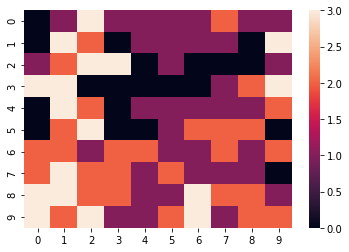

In [7]:
class OnPolicyMCAgent:
    def __init__(self,environment,discount_factor = 0.7,epsilon = 0.25):
        self.epsilon = epsilon
        self.env = environment
        self.q = np.zeros((self.env.nS, self.env.nA))
        self.Returns = list('')
        for i in range(self.env.nS):
            self.Returns.append(list(''))
            for j in range (self.env.nA):
                self.Returns[i].append(list(''))
        self.gamma = discount_factor
        pass

    def probabilities(self,values):
        # Calculating Probability of each action in a state out of action values
        max_action = np.argmax(values)
        res = np.ones(values.shape[0]) * (self.epsilon/self.env.nA)
        res[max_action] = 1 - self.epsilon + self.epsilon/self.env.nA
        error = (sum(res) - 1)/res.shape[0]
        res -= error
        return res

    def generate_episode(self): #Using epsilon soft policy
        state = self.env.reset()
        trajectory = list('')
        while True:
            # Decision Making Based On Policy without exploring start

            probs = self.probabilities(self.q[state])
            action = np.random.choice(np.arange(self.env.nA),p=probs)
            next_state, reward, done, info = self.env.step(action)
            trajectory.append((state,action,reward))
            state = next_state
            if done or len(trajectory) == 500: # Episode max length of 500
                return trajectory


    def control(self):
        G = 0
        episode = self.generate_episode()
        for idx,step in enumerate(episode[::-1]):
            G = self.gamma * G + step[2]
            if step[0] not in np.array(episode[::-1])[:,0][idx+1:]: # first visit
                self.Returns[step[0]][step[1]].append(G)
                self.q[step[0]][step[1]] = np.mean(self.Returns[step[0]][step[1]])
        pass
    
    def print_agent(self):
        ax = sns.heatmap(np.argmax(self.q,axis=1).reshape((10,10)))
        print(np.argmax(self.q,axis=1).reshape((10,10)))


def main():
    env = GridworldEnv()
    agent = OnPolicyMCAgent(env)

    start = time.time()
    for i in range(8000): # number of episodes
        agent.control()
    print('Total Execution Time = ', (time.time() - start) / 60 , 'Min')
    agent.print_agent()

main()

##Off Policy MC Control

Total Execution Time =  36.54353999296824 Min
[[0 0 2 1 1 1 0 1 1 1]
 [0 1 2 0 1 1 1 1 0 3]
 [0 1 2 1 3 1 0 1 0 0]
 [0 0 3 0 0 0 1 1 0 2]
 [0 0 0 0 1 1 1 1 2 0]
 [2 3 0 0 0 1 1 1 1 1]
 [2 2 2 2 1 2 2 2 3 2]
 [2 2 3 2 1 1 1 2 2 0]
 [3 2 1 2 2 0 2 0 2 3]
 [1 2 1 3 2 1 1 3 0 0]]


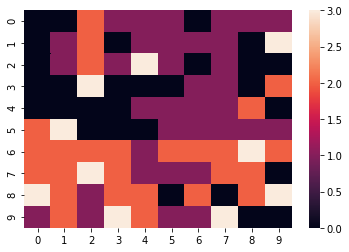

In [13]:
class OffPolicyAgent:
    def __init__(self,environment,discount_factor = 0.7,epsilon = 0.25):
        self.epsilon = epsilon
        self.gamma = discount_factor
        self.env = environment
        self.Q = np.rsndom((self.env.nS,self.env.nA))
        self. C = np.zeros((self.env.nS,self.env.nA))

    def probabilities(self,values):
        # Calculating Probability of each action in a state out of action values
        max_action = np.argmax(values)
        res = np.ones(values.shape[0]) * (self.epsilon/self.env.nA)
        res[max_action] = 1 - self.epsilon + self.epsilon/self.env.nA
        error = (sum(res) - 1)/res.shape[0]
        res -= error
        return res

    def generate_episode(self):
        state = self.env.reset()
        trajectory = list('')
        while True:
            # Decision Making Based On a random Behavour Policy
            action = np.random.randint(self.env.nA)
            next_state, reward, done, info = self.env.step(action)
            trajectory.append((state,action,reward))
            state = next_state
            if done or len(trajectory) == 500: # Episode max length of 500
                return trajectory

    def control(self):
        G = 0
        W = 1
        episode = self.generate_episode()
        for idx, step in enumerate(episode[::-1]):
            G = self.gamma * G + step[2]
            if step[0] not in np.array(trajectory)[::-1][:,0][idx+1]:# first visit check
                self.C[step[0]][step[1]]  += W
                self.Q[step[0]][step[1]] += (W/self.C[step[0]][step[1]]) * (G -self.Q[step[0]][step[1]])
                
                action = np.argmax(self.Q[step[0]])
                if action != step[1]:
                    break
                
                #W *= (1 /(1/self.env.nA))
                W *= self.env.nA

def main():
    env = GridworldEnv()
    agent = OnPolicyMCAgent(env)

    start = time.time()
    for i in range(8000): # number of episodes
        agent.control()
    print('Total Execution Time = ', (time.time() - start) / 60 , 'Min')
    agent.print_agent()

main()


##Q-Learning

In [ ]:
class Q_agent:
    def __init__(self,environment,discount_factor = 0.8, epsilon = 0.25, step_size = 0.2)
        self.alpha = step_size
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.env = environment
        self.Q = np.zeros((self.env.nS,self.env.nA))
    
    def probabilities(self,values):
        # Calculating Probability of each action in a state out of action values
        max_action = np.argmax(values)
        res = np.ones(values.shape[0]) * (self.epsilon/self.env.nA)
        res[max_action] = 1 - self.epsilon + self.epsilon/self.env.nA
        error = (sum(res) - 1)/res.shape[0]
        res -= error
        return res
    
    def take_action(self,state):
        # Decision making based on Epsilon Greedy Policy
        max_action = ''
        max_next_reward = -10

        if np.random.uniform(0,1) <= self.epsilon: # Random Action
            action = np.random.choice(self.env.nA)
        else: # Greedy action
            action = np.random.choice(self.env.nA,self.probabilities(self.Q[state]))
        next_state, reward, done, info = env.step(action)
        return reward, next_state

    def control(self):
        state = self.env.reset() # Go to initial state

        while True:
            R, S = self.take_action(state)
            self.Q[] 

## Tree Back-up

## SARSA